# **TIME SERIES FORECASTING - INTRODUCTION**

Name: **INTRODUCTION**  
Date : 2022  
Author: Aurélien Vannieuwenhuyze  


<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licence Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under the terms of the <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License.</a>.
<hr/>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm
from matplotlib.pyplot import figure
import math

## **1: WHAT IS A TIME SERIES?**

### 1.1: Definition

> A time series is a series of data points indexed (or listed or graphed) in time order (wikipedia)

> A time series can be **univariate** or **multivariate**

### 1.2: Uses cases

- Financial, healthcare, ...


A lot of datasets : https://archive.ics.uci.edu/ml/datasets.php?format=&task=&att=&area=&numAtt=&numIns=&type=ts&sort=taskUp&view=table


## 2: COMPONENTS AND MODELS

In [ ]:
#-- Function for generating a normal distribution between two values 
def get_truncated_normal(mean=0, sd=1, low=0, upp=10, nbDatas=10):
    return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd).rvs(size=nbDatas)

### 2.1: Components

#### 2.1.1: Trend $T_t$

Trend is a pattern in data that shows the movement of a series to relatively higher or lower values over a long period of time. In other words, a trend is observed when there is an increasing or decreasing slope in the time series. 

#### 2.1.2: Seasonality $S_t$

Seasonality is a characteristic of a time series in which the data experiences regular and predictable changes that recur every calendar year. Any predictable fluctuation or pattern that recurs or repeats over a one-year period is said to be seasonal.

#### 2.1.:3 Remainder (residuals) $R_t$
Describes random, irregular influences. It represents the residuals or remainder of the time series after the other components have been removed

### 2.2: Additive decomposition

$$y_t = T_t + S_t + R_t$$

In [ ]:
datas = np.arange(1,50)
Trend = datas * 3
Seasonality = 10 + np.sin(datas) * 30
Remainder = get_truncated_normal(mean=0, sd=1, low=min(datas), upp=max(datas),nbDatas=len(datas))

In [ ]:
TimeSeries = Trend+Seasonality+Remainder

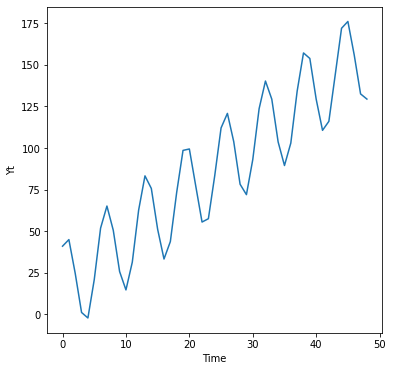

In [ ]:
figure(figsize=(6, 6))
plt.plot(TimeSeries)
plt.xlabel("Time")
plt.ylabel("Yt")
plt.show()

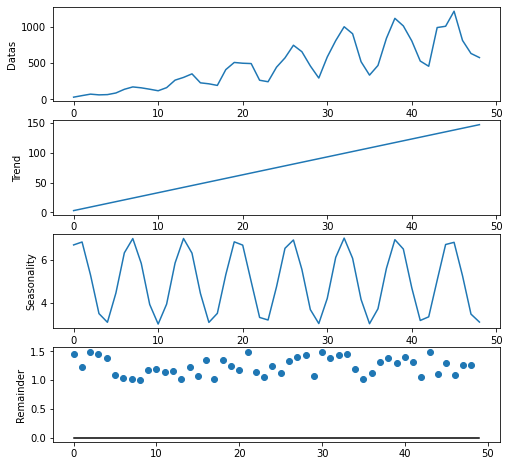

In [ ]:
fig, axs = plt.subplots(4,figsize=(8, 8))
axs[0].plot(TimeSeries)
axs[0].set_ylabel('Datas')
axs[1].plot(Trend)
axs[1].set_ylabel('Trend')
axs[2].plot(Seasonality)
axs[2].set_ylabel('Seasonality')
axs[3].plot(Remainder,marker='o', linestyle='none')
axs[3].plot((0,len(datas)), (0, 0), color='#000000', zorder=-3)
axs[3].set_ylabel('Remainder')
plt.show()

###2.3: Multiplicative decomposition

$$y_t = T_t * S_t * R_t$$

In [ ]:
datas = np.arange(1,50)
Trend = datas * 3
Seasonality = 5 + np.sin(datas) * 2
Remainder = get_truncated_normal(mean=0, sd=1, low=1, upp=1.5,nbDatas=len(datas))

In [ ]:
#Multiplicative
TimeSeries = Trend*Seasonality*Remainder

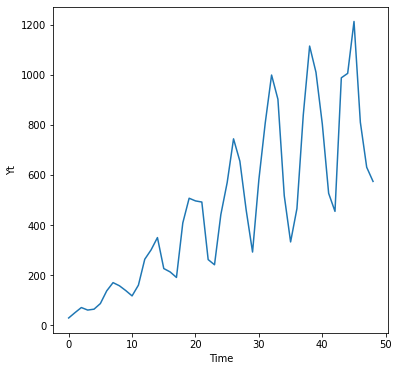

In [ ]:
figure(figsize=(6, 6))
plt.plot(TimeSeries)
plt.xlabel("Time")
plt.ylabel("Yt")
plt.show()

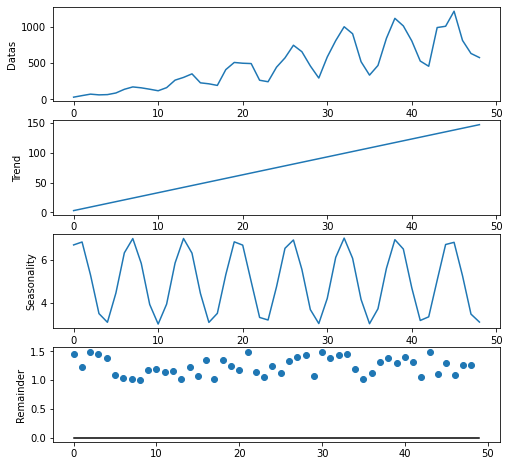

In [ ]:
fig, axs = plt.subplots(4,figsize=(8, 8))
axs[0].plot(TimeSeries)
axs[0].set_ylabel('Datas')
axs[1].plot(Trend)
axs[1].set_ylabel('Trend')
axs[2].plot(Seasonality)
axs[2].set_ylabel('Seasonality')
axs[3].plot(Remainder,marker='o', linestyle='none')
axs[3].plot((0,len(datas)), (0, 0), color='#000000', zorder=-3)
axs[3].set_ylabel('Remainder')
plt.show()

### 2.4: Different types of trend

#### 2.4.1: Linear Trend

$$T_t = \beta_0 + \beta_1t + \epsilon_t$$

In [ ]:
datas = np.arange(1,51)

beta_0 = 5
beta_1 = 2.6
epsilon = 0.03

Trend=[]
for t in datas :
  Trend.append(beta_0 + beta_1*t + epsilon )


Seasonality = 10 + np.sin(datas) * 30
Remainder = get_truncated_normal(mean=0, sd=1, low=min(datas), upp=max(datas),nbDatas=len(datas))

TimeSeries = Trend+Seasonality+Remainder

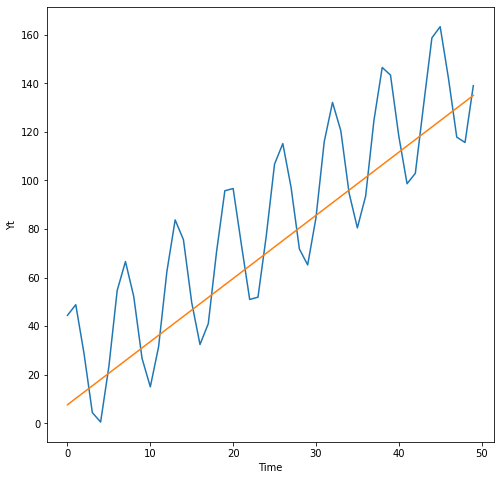

In [ ]:
figure(figsize=(8, 8))
plt.plot(TimeSeries)
plt.plot(Trend)
plt.xlabel("Time")
plt.ylabel("Yt")
plt.show()

$$T_t = \beta_0 + \beta_1t + \beta_2t^2+...+\beta_nt^n+\epsilon_t$$

In [ ]:
datas = np.arange(1,51)

beta_0 = 5
beta_1 = 0.5
beta_2 = 0.07
epsilon = 0.03

Trend=[]
for t in datas :
  Trend.append(beta_0 + beta_1*t + beta_2*t**2 + epsilon)


Seasonality = 10 + np.sin(datas) * 30
Remainder = get_truncated_normal(mean=0, sd=1, low=min(datas), upp=max(datas),nbDatas=len(datas))

TimeSeries = Trend+Seasonality+Remainder

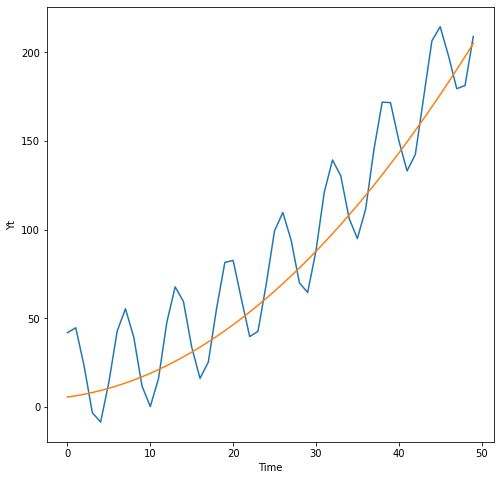

In [ ]:
figure(figsize=(8, 8))
plt.plot(TimeSeries)
plt.plot(Trend)
plt.xlabel("Time")
plt.ylabel("Yt")
plt.show()

####2.4.2: Non linear trend

Smoot transition model is used to model transitions from one state to another.  

The transition depends of $\beta_0$



$$T_t = \frac{1}{1+ exp[\beta_0(t-\beta_1)]}+\epsilon_t$$

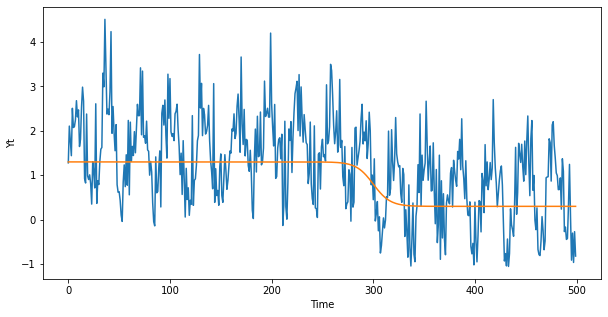

In [ ]:
datas = np.arange(0,100,0.2)
beta_0 = 0.6
beta_1 = 60
epsilon = 0.3

Trend=[]
for t in datas:
    exp = math.exp(beta_0*(t-beta_1))
    T_t = (1 / (1+exp))+epsilon
    Trend.append(T_t)

Seasonality = -0.5+np.sin(datas)+0.02
Remainder = get_truncated_normal(mean=0, sd=1, low=min(datas), upp=max(datas),nbDatas=len(datas))

TimeSeries = Trend+Seasonality+Remainder

figure(figsize=(10, 5))
plt.plot(TimeSeries)
plt.plot(Trend)
plt.xlabel("Time")
plt.ylabel("Yt")
plt.show()

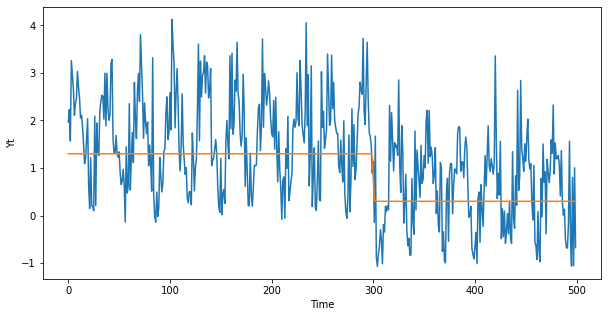

In [ ]:
datas = np.arange(0,100,0.2)
beta_0 = 15
beta_1 = 60
epsilon = 0.3

Trend=[]
for t in datas:
    exp = math.exp(beta_0*(t-beta_1))
    T_t = (1 / (1+exp))+epsilon
    Trend.append(T_t)

Seasonality = -0.5+np.sin(datas)+0.02
Remainder = get_truncated_normal(mean=0, sd=1, low=min(datas), upp=max(datas),nbDatas=len(datas))

TimeSeries = Trend+Seasonality+Remainder

figure(figsize=(10, 5))
plt.plot(TimeSeries)
plt.plot(Trend)
plt.xlabel("Time")
plt.ylabel("Yt")
plt.show()